In [27]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
#png = Image.open("Flags/100px-Flag_of_the_Vatican_City.svg.png")
png = Image.open("Flags/Flag_of_El_Salvador.svg.png")
#png = Image.open("Flags/100px-Flag_of_Switzerland.svg.png")
#png = Image.open("Flags/180px-Flag_of_Sri_Lanka.svg.png")

In [34]:
fileNames = [f for f in listdir("Flags/") if isfile(join("Flags/", f))]
fileNames

['143px-Flag_of_Brazil.svg.png',
 '117px-Flag_of_Niger.svg.png',
 '150px-Flag_of_Thailand.svg.png',
 '180px-Flag_of_Tajikistan.svg.png',
 '150px-Flag_of_the_Netherlands.svg.png',
 'Flag_of_Greece.svg.png',
 '150px-Flag_of_Zambia.svg.png',
 '180px-Flag_of_South_Sudan.svg.png',
 '180px-Flag_of_Somaliland.svg.png',
 '160px-Flag_of_Palau.svg.png',
 '180px-Flag_of_Bosnia_and_Herzegovina.svg.png',
 '150px-Flag_of_Saudi_Arabia.svg.png',
 'Flag_of_Palestine.svg.png',
 '180px-Flag_of_Tuvalu.svg.png',
 '180px-Flag_of_Samoa.svg.png',
 '150px-Flag_of_The_Gambia.svg.png',
 '150px-Flag_of_Bhutan.svg.png',
 '150px-Flag_of_Benin.svg.png',
 '140px-Flag_of_Kosovo.svg.png',
 '160px-Flag_of_Argentina.svg.png',
 '180px-Flag_of_New_Zealand.svg.png',
 '150px-Flag_of_Rwanda.svg.png',
 '150px-Flag_of_the_Central_African_Republic.svg.png',
 'Flag_of_the_Republic_of_the_Congo.svg.png',
 '150px-Flag_of_Cameroon.svg.png',
 '150px-Flag_of_Burkina_Faso.svg.png',
 '150px-Flag_of_Indonesia.svg.png',
 '167px-Flag_of_Ba

In [29]:
def GetIntRGB(rgbTuple):
    rate = 85
    r,g,b,*alpha = rgbTuple
    rgb = int(r/rate)*rate
    rgb = (rgb << 8) + int(g/rate)*rate
    rgb = (rgb << 8) + int(b/rate)*rate
    return rgb

In [30]:
def GetRGBFromInt(rgb):
    r = (rgb >> 16) & 0xFF
    g = (rgb >> 8) & 0xFF
    b = rgb & 0xFF;
    return (r,g,b)

In [31]:
def GetDictFor3Colored(png):
    arr = np.array(png)
    totalPixels = arr.shape[0]*arr.shape[1]
    #print("GetDictFor3Colored")
    arr2 = arr.reshape((totalPixels, arr.shape[2]))
    colorLst = list(map(lambda x:GetIntRGB(tuple(x)), arr2))
    colorDic = {}
    for color in colorLst:
        if(color in colorDic):
            continue
        count = colorLst.count(color)
        if(count > totalPixels / 50):
            colorDic[color] = count/totalPixels
    return colorDic

In [32]:
def GetDictFor1Colored(png):
    #print("GetDictFor1Colored")
    im2 = png.convert("RGB")
    internalDic = im2.getcolors()
    totalPixels = np.array(internalDic)[:,0].sum()
    colorDic = {GetIntRGB(x[1]):x[0]/totalPixels for x in internalDic if x[0] > totalPixels/50}
    return colorDic

In [33]:
fileDics = {}
i=0
for file in fileNames:
    i = i + 1
    #print(i, file)
    png = Image.open("Flags/"+file)
    if(png.getcolors() is None):
        fileDics[file] = GetDictFor3Colored(png)
    else:
        fileDics[file] = GetDictFor1Colored(png)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (65, 2) + inhomogeneous part.

In [8]:
fileDics

{'143px-Flag_of_Brazil.svg.png': {21760: 0.6814685314685315,
  11184640: 0.17195804195804196,
  85: 0.11573426573426573}}

In [9]:
uniqueColors = set(x for dic in fileDics.values() for x in dic)

In [10]:
len(uniqueColors)

3

In [11]:
dicFull = {key:0 for key in sorted(uniqueColors)}

In [12]:
fileFullDics = {}

In [13]:
for item in fileDics.items():
    file, dic = item
    dicFullCopy = dicFull.copy()
    for key in dic:
        dicFullCopy[key] = dic[key]
    fileFullDics[file] = list(dicFullCopy.values())# + [len(dic)/20]

In [14]:
#fileFullDics["Flag_of_Zimbabwe.svg.png"]

In [15]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
listOfVectors = list(fileFullDics.values())

In [17]:
np.array(listOfVectors).shape

(1, 3)

In [18]:
clustering = DBSCAN(eps=0.4179, min_samples=3).fit(listOfVectors)
clustering.labels_, max(clustering.labels_)

(array([-1]), -1)

In [19]:
np.count_nonzero(clustering.labels_ == -1)

1

In [20]:
def my_scorer_dbscan(estimator, X, y=None):
    estimator.fit(X)
    return -1 * np.count_nonzero(estimator.labels_ == -1) + 35 * max(estimator.labels_)

In [21]:
from sklearn.model_selection import GridSearchCV
param_grid = [{ "eps": np.linspace(0.1, 0.5, 40),
        "min_samples": [3,4,5] }]

dbs=DBSCAN() 
grid_search = GridSearchCV(dbs, param_grid, cv=3, scoring=my_scorer_dbscan)
grid_search.fit(listOfVectors)

ValueError: Cannot have number of splits n_splits=3 greater than the number of samples: n_samples=1.

In [22]:
print(grid_search.best_params_)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [23]:
ncl = 40
inertia = [KMeans(n_clusters=i, init='k-means++').fit(listOfVectors).inertia_ for i in range(1,ncl)]

ValueError: n_samples=1 should be >= n_clusters=2.

In [24]:
plt.plot(range(1,ncl), inertia)
plt.xticks(range(1,ncl))

NameError: name 'inertia' is not defined

In [25]:
kmeans = KMeans(n_clusters=16, init='k-means++').fit(listOfVectors)
kmeans.labels_

ValueError: n_samples=1 should be >= n_clusters=16.

In [26]:
names = np.array(list(fileFullDics.keys()))[kmeans.labels_ == 9]

NameError: name 'kmeans' is not defined

In [103]:
def GetCountryName(fileName):
    startIndex = fileName.find("Flag_of_")
    endIndex = fileName.find(".svg.png")
    return fileName[startIndex+8:endIndex].replace("_", " ")

In [104]:
len(names)

25

In [105]:
def PrintGroup(names):
    rows = 7
    width = int(len(names)/rows) + 1
    f, axarr = plt.subplots(min(len(names),rows),max(2,width), facecolor='lightgray') #sharex=True, sharey=True,

    f.subplots_adjust(right= 2, top = 0.99, bottom=0.01, hspace=1, wspace=0.4)
    axflat = axarr.flat
    i=0
    for name in names:
        png = Image.open("Flags/"+name)
        axflat[i].figsize=(8,8)
        axflat[i].imshow(png)
        axflat[i].axes.xaxis.set_visible(False)
        axflat[i].axes.yaxis.set_visible(False)
        axflat[i].set_title(GetCountryName(name))
        i = i + 1

    for i in range(min(len(names),rows) * max(2,width) - len(names)):
        axflat[-1-i].set_visible(False)

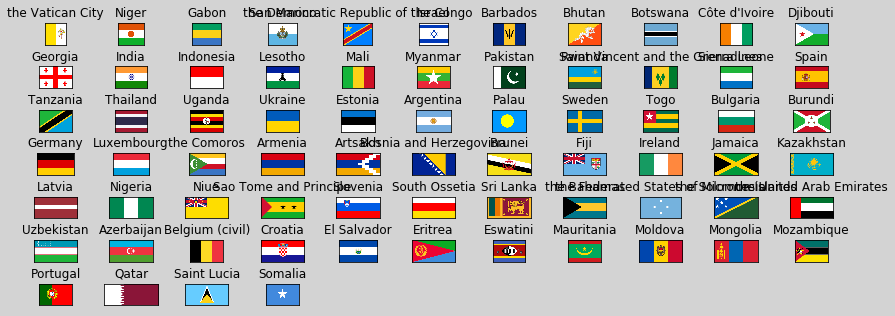

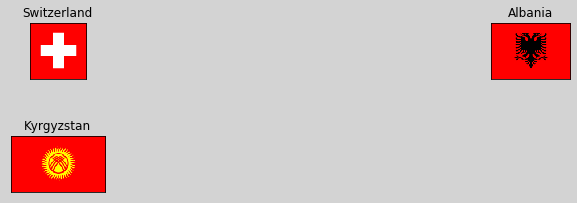

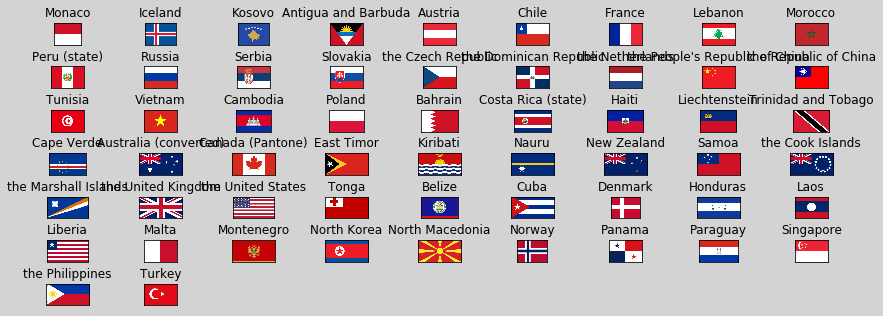

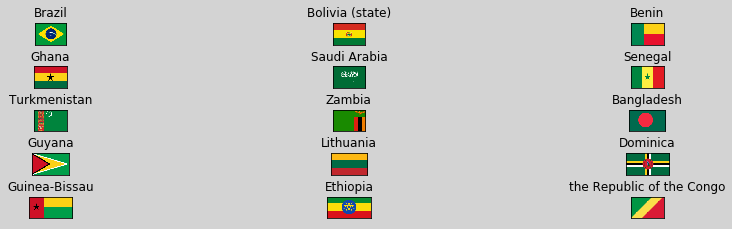

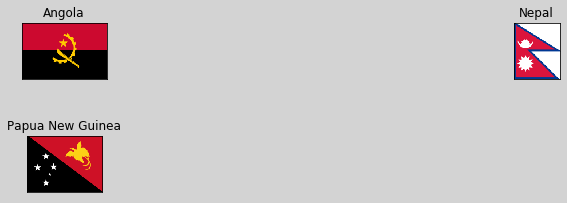

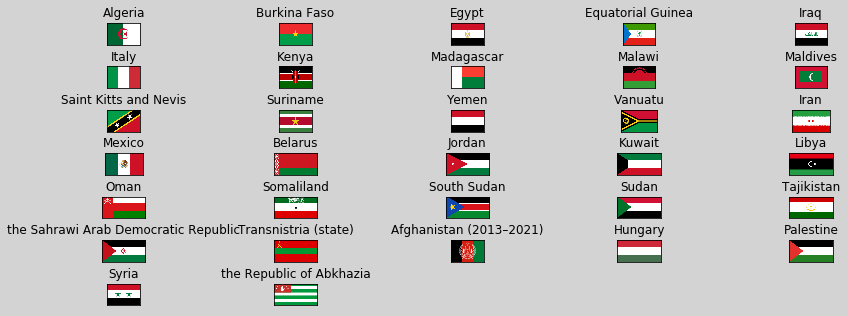

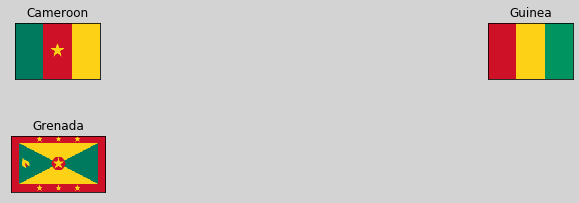

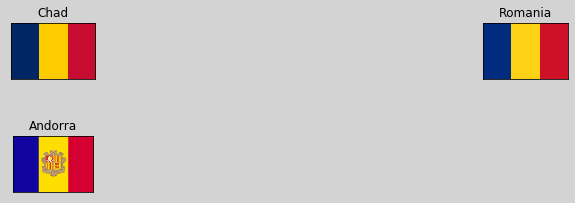

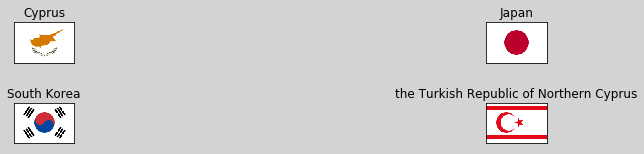

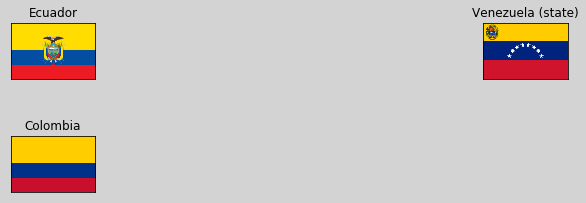

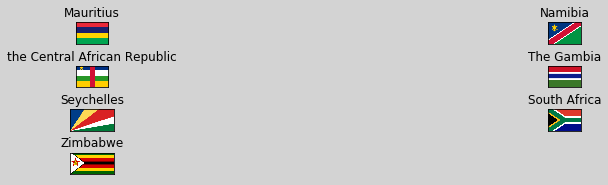

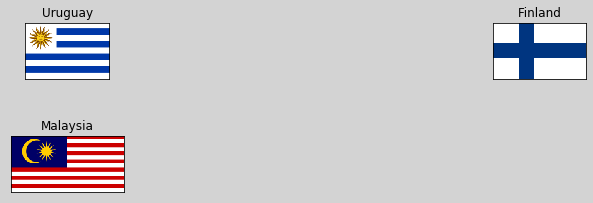

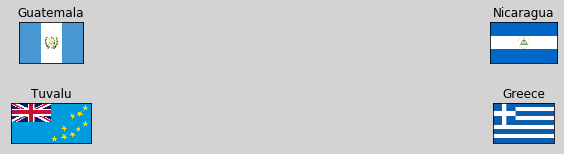

<Figure size 432x288 with 0 Axes>

In [156]:
alg = clustering
#alg = kmeans
for groupId in range(-1, max(alg.labels_)+2):
    group = np.array(list(fileFullDics.keys()))[alg.labels_ == groupId]
    PrintGroup(group)

In [35]:
from sklearn.decomposition import PCA, KernelPCA
pca = KernelPCA(n_components=2, kernel="poly", degree=7)
pca.fit(listOfVectors)

KernelPCA(degree=7, kernel='poly', n_components=2)

In [36]:
from sklearn.metrics import mean_squared_error
def my_scorer(estimator, X, y=None):
    X_reduced = estimator.transform(X)
    X_preimage = estimator.inverse_transform(X_reduced)
    return -1 * mean_squared_error(X, X_preimage)

In [37]:
from sklearn.model_selection import GridSearchCV
param_grid = [{ "degree": [1,2,3,4],
        "gamma": [0.1, 0.5, 1, 2, 3],
        "kernel": ["rbf","sigmoid"]  }]

kpca=KernelPCA(n_components=2, kernel="rbf", gamma=1, fit_inverse_transform=True, n_jobs=-1) 
grid_search = GridSearchCV(kpca, param_grid, cv=3, scoring=my_scorer)
grid_search.fit(listOfVectors)

ValueError: Cannot have number of splits n_splits=3 greater than the number of samples: n_samples=1.

In [222]:
print(grid_search.best_params_)

{'degree': 1, 'gamma': 2, 'kernel': 'rbf'}


In [223]:
X_pca = grid_search.transform(listOfVectors)

In [224]:
listOfCoordinates = [(x[0]*80, x[0]*80+10, x[1]*80, x[1]*80+6) for x in X_pca]
listOfImages = [Image.open("Flags/"+file) for file in fileFullDics.keys()]

In [225]:
import matplotlib.offsetbox as osb

In [226]:
def imscatter(x, y, image, ax=None, zoom=1):
    if ax is None:
        ax = plt.gca()
    try:
        image = plt.imread(image)
    except TypeError:
        # Likely already an array...
        pass
    im = osb.OffsetImage(image, zoom=zoom)
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0 in zip(x, y):
        ab = osb.AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists

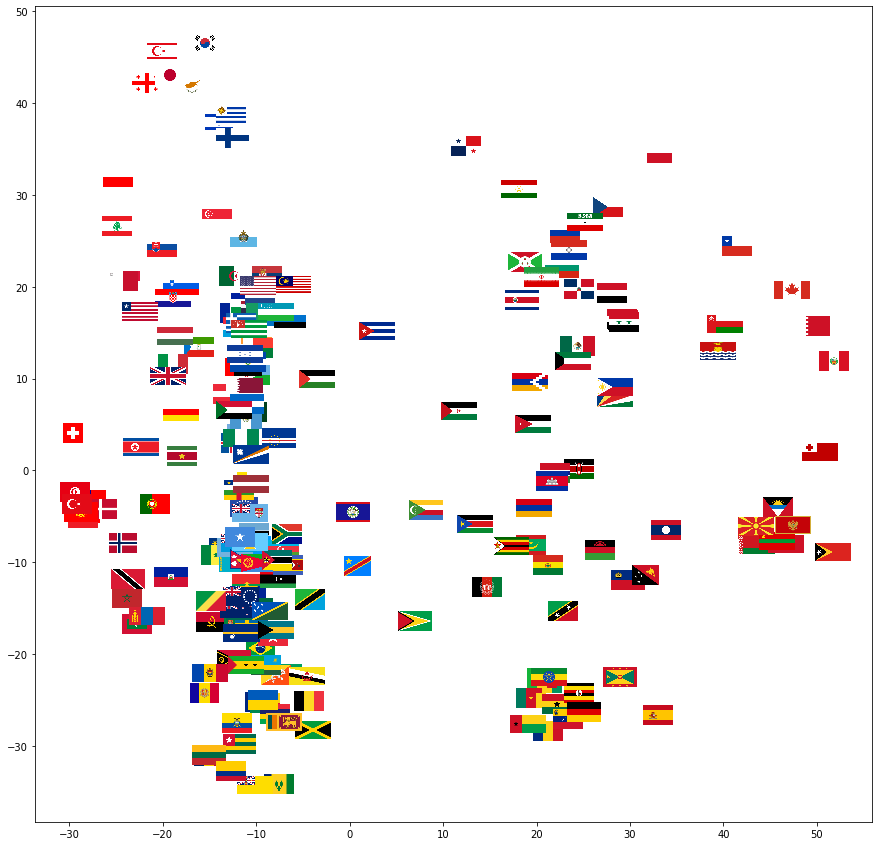

In [227]:
#image_path = get_sample_data('ada.png')
fig, ax = plt.subplots()
fig.set_figheight(15)
fig.set_figwidth(15)
ax.set_xlim([-140, 165])
ax.set_ylim([-160, 160])
for xy, file in zip(X_pca, fileFullDics.keys()):
    imscatter(xy[0]*80, xy[1]*80, "Flags/" + file, zoom=0.2, ax=ax)
    ax.plot(xy[0]*80, xy[1]*80)
plt.show()
#fig, ax = plt.subplots(1, 1)

#for extent, img in zip(listOfCoordinates, listOfImages):
#    ax.imshow(img, extent=extent)
    
#plt.scatter(X_pca[:, 0]*80, X_pca[:, 1]*80)

In [34]:
X_pca[:3]

array([[-0.3155923 , -0.02088268],
       [-0.28667844,  0.03280421],
       [ 0.15100817,  0.05128264]])

<code style="background:rgb(250, 25, 0);color:white">[250, 25, 0]</code>
<code style="background:rgb(255, 49, 0);color:white">[255, 49, 0]</code>
<code style="background:rgb(255, 49, 24);color:white">[255, 49, 24]</code>
<code style="background:rgb(0, 83, 78);color:white">[0, 83, 78]</code>
<code style="background:rgb(0, 75, 75);color:white">[0, 75, 75]</code>
<code style="background:rgb(200,  16,  16);color:white">[0, 75, 75]</code>

In [ ]:
int(35/25)*25